In [8]:
from tensorflow import keras
from tf_keras_vis.activation_maximization import ActivationMaximization
import matplotlib.pyplot as plt
import tensorflow as tf

In [9]:
model =  keras.models.load_model('/Users/luizeduardosantos/Documents/Turing/Interpretando-CNNs/model2-files/')

In [10]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 60, 60, 64)        36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 230400)            0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)               

In [11]:
from tf_keras_vis.utils.model_modifiers import ExtractIntermediateLayer, ReplaceToLinear
layer_name = 'conv2d_11' 

# This instance constructs new model whose output is replaced to `conv2d_11` layer's output.
extract_intermediate_layer = ExtractIntermediateLayer(index_or_name=layer_name)
# This instance modify the model's last activation function to linear one.
replace2linear = ReplaceToLinear()

# Instead of using ExtractIntermediateLayer and ReplaceToLinear instance,
# you can also define the function from scratch as follows:
def model_modifier_function(current_model):
    target_layer = current_model.get_layer(name=layer_name)
    target_layer.activation = tf.keras.activations.linear
    new_model = tf.keras.Model(inputs=current_model.inputs,
                               outputs=target_layer.output)
    return new_model

In [12]:
from tf_keras_vis.utils.scores import CategoricalScore

filter_number = 3
score = CategoricalScore(filter_number)

# Instead of using CategoricalScore object above,
# o autor ensina ocmo definir uma funcao de erro personalizada

In [13]:
from tf_keras_vis.activation_maximization import ActivationMaximization

activation_maximization = ActivationMaximization(model,
                                                 # Please note that `extract_intermediate_layer` has to come before `replace2linear`.
                                                 model_modifier=[extract_intermediate_layer, replace2linear],
                                                 clone=True)

200/200 [==============================] - 21s 106ms/step - Score: -12.8095 - TotalVariation2D: 5.2886 - Norm: 13.0344


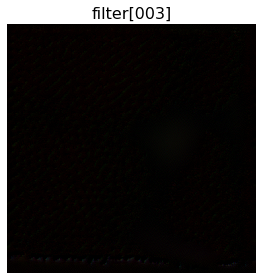

In [14]:
from tf_keras_vis.activation_maximization.callbacks import Progress
 
# Generate maximized activation
activations = activation_maximization(score,
                                      callbacks=[Progress()])

## Since v0.6.0, calling `astype()` is NOT necessary.
# activations = activations[0].astype(np.uint8)

# Render
f, ax = plt.subplots(figsize=(4, 4))
ax.imshow(activations[0])
ax.set_title('filter[{:03d}]'.format(filter_number), fontsize=16)
ax.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
print(activations[0])